## Image approximation with orthogonal basis

The input image is  the following RGB image and its gray scale rendering, stored as
matrices of size (m,n,3) and (m,n) respectively: 

shape original image (768, 1024, 3)


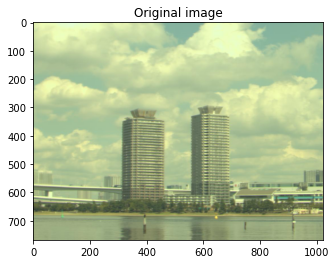

shape gray scale image (768, 1024)


Text(0.5, 1.0, 'Gray scale  image')

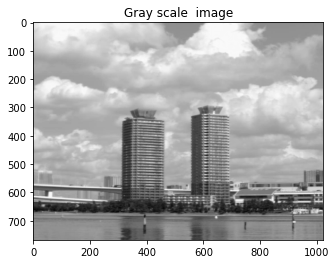

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import scipy.linalg as spl
img=mpimg.imread('0006.jpg')
print('shape original image',img.shape)
imgplot = plt.imshow(img)
plt.title('Original image')
plt.show()
# gray scale computation
rgb_weights = [0.2989, 0.5870, 0.1140]
imgg=np.dot(img,rgb_weights)
print('shape gray scale image',imgg.shape)
imgplot = plt.imshow(imgg,cmap=plt.get_cmap("gray"))
plt.title('Gray scale  image')

Compute:

1) the QR factorization with pivoting of the gray scale image such that: $imgg Pimg = Qimg Timg$ ;

2) the URV factorization: firstly, perform the QR factorization with pivoting; then perform the QR factorization on the resulting matrix Timg transposed so that $\,Timg^\top= Vimg Bimg$ and $\,imgg Pimg = Qimg Bimg^\top Vimg^\top$ ;

3) the thin SVD factorization of $imgg$, $A = Uimg Simg Vimg^\top$. 

To perform the QR factorization, use the scipy routine qr
of the  modulus linalg with pivoting set to 'true' in order to have 
the elements of the rectangular matrix sorted:   

[Qimg,Timg,Pimg]=spl.qr(imgg,pivoting=True)

note that $Pimg$ contains the index of the permuted columns 
of $imgg$. The algorithm finds an orthogonal matrix
$Qimg$ and a rectangular matrix $Rimg$ such that 
$imgg[:,Pimg]=Qimg*Timg$

Given the tolerances $1e-1, 5e-2, 1e-2, 5e-3$ for each tolerance compute several approximations of the matrix $imgg$ by choosing:

1) only the first $nc$ columns of the matrix $Qimg$ and $nc$ rows of the matrix $Timg$, where $nc$ is chosen with the following steps: 
  
  a) extract the diagonal elements of $Timg$ and copy them in $Tdiag$;
    
  b) scale the absolute values of $Tdiag$ with respect to its absolute maximum;
    
  c) compute $nc$ as the number of elements of $Tdiag$ that are greater than the chosen tolerance.
  
2) Only the first $nc$ columns of the matrix $Qimg$, $nc$ columns of the matrix $Vimg$ and the first $nc$ columns and $nc$ rows of the matrix $Bimg$ where $nc$ is chosen with the following steps: 

  a) extract the diagonal elements of $Bimg$ and copy them in $Bdiag$;
    
  b) scale the absolute values of $Bdiag$ with respect to its absolute maximum;
    
  c) compute $nc$ as the number of elements of $Bdiag$ that are greater than the chosen tolerance.

3) Only the first $nc$ right and left singular vectors and only $nc$ singular values where $nc$ is chosen with the following steps: 

  b) scale the singular values  with respect to the maximum singular value;
    
  c) compute $nc$ as  the number of the scaled singular values  that are greater than the chosen tolerance.
    
For each value of the tolerances plot the approximate images in gray scale.
To compare the results write a function that computes the correlation between the reconstructed image and the original one by reshaping the two images as two vectors. 

Comments the obtained results.
 

# Digit recognition

Given the following 'mnist' dataset 


In [143]:
f = open("mnist_test_10.csv", 'r')
m_test = f.readlines()
f.close()

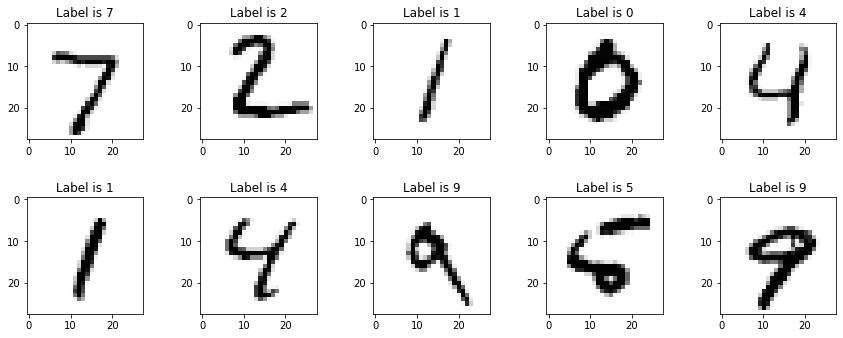

In [144]:
import matplotlib.pylab as plt
fig = plt.figure(figsize=(15,15));
count=1
ncol_img = 28
nrow_img = 28
col_test = len(m_test)
row_test= ncol_img*nrow_img
test_array = np.zeros( (row_test,col_test) )
test_lab = np.zeros((row_test,1))
ik=0
for line in m_test:
    lab_img = line.split(',')
    imarray = numpy.asfarray(lab_img[1:]).reshape((ncol_img,nrow_img))
    test_array[:,ik] = imarray.reshape(row_test)
    test_lab[ik] = numpy.asarray(lab_img[0])
    ik = ik+1
    subplot(5,5,count)
    subplots_adjust(hspace=0.5)
    count += 1
    title("Label is " + lab_img[0])
    imshow(imarray, cmap='Greys', interpolation='None')
    pass

In [145]:
f = open("mnist_train_100.csv", 'r')
m_train = f.readlines()
f.close()
len(m_train)

100

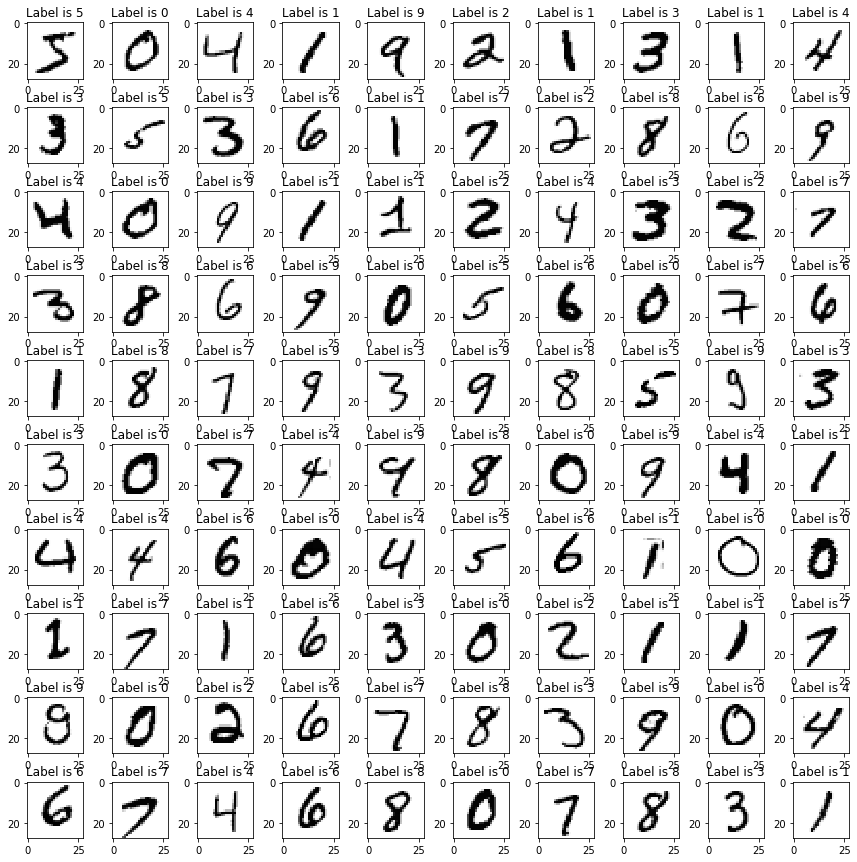

In [146]:
import matplotlib.pylab as plt
fig = plt.figure(figsize=(15,15));
count=1
ncol_img = 28
nrow_img = 28
col_train = len(m_train)
row_train= ncol_img*nrow_img
train_array = np.zeros( (row_train,col_train) )
train_lab = np.zeros((row_train,1))
ik = 0
for line in m_train:
    lab_img = line.split(',')
    imarray = numpy.asfarray(lab_img[1:]).reshape((28,28))
    train_array[:,ik] = imarray.reshape(row_train)
    train_lab[ik] = numpy.asarray(lab_img[0])
    ik = ik+1
    subplot(10,10,count)
    subplots_adjust(hspace=0.5)
    count += 1
    title("Label is " + lab_img[0])
    imshow(imarray, cmap='Greys', interpolation='None')
    pass

Given the  matrix containing the training-set,  compute the mean image and subtract it from all the other images. Perform the PCA of the resulting matrix. For each digit in the training-set compute its class, that is the mean of the coordinates of the projection in the orthogonal column space defined by the PCA factorization. Determine to which class every digit of the test-set belongs to by computing the minimal two norm distance.

Check and compare all the studied techniques to find the minimal value of k, number of principal components that are useful to classify the digit.

Classify all the digits in the test-set and compute the confusion matrix. That is the matrix where, for each digit i, the element of index i,j contains the number of observations known to be in group i and predicted to be in group j. Use sklearn.metrics.confusion_matrix and compute also the classification report using sklearn.metrics.classification_report.

# PERCEPTRON

Implement a model that describes a linear classifier that divides the Cartesian plane into two halves, the line in the test-data  is $y=-3x$. We want to learn a parameter vector such that our model makes the right prediction. This model is called a linear perceptron. The cost function minimizes the distance in the two norm. 


In [ ]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot

Use the following neuron

In [ ]:
def sigmoid(t): return (1-np.exp(-t))/(1+np.exp(-t))
def neuron(w,b,x):return sigmoid(np.inner(w,x)+b)

In [129]:
#Train the neuron with the following  data
data = np.array([[[1,-2],+1],
       [[-1,2],-1],
       [[-0.1,0.5],1],
       [[0.1,-0.5],-1]])

data1 = np.array([p[0] for p in data if p[1]>0])
data2 = np.array([p[0] for p in data if p[1]<0])


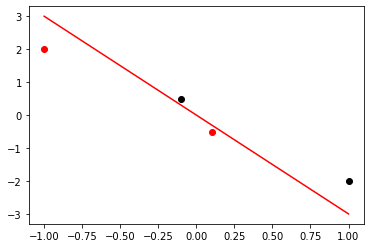

In [130]:
matplotlib.pyplot.plot([-1,1],[3,-3],'r', data1[::,0], data1[::,1],'ko',  data2[::,0], data2[::,1],'ro');

Find the correct label for the following dataset:

dataset = np.random.randn(100,2)

- by using scipy.optimize.minimize;
- by implementing the line-search method with the steepest descend direction and constant value of the step-length;
- by implementing the line-search method with the steepest descend direction and with the backtraking approach at each iteration, for the computation of the step-length.

Compare the results obtained with the three methods.